<h2>RNN for Image Classification</h2>
using RNN to classify MNIST data


In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, LSTM, GlobalMaxPool1D, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [2]:
# loading the data
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# noremalize data
x_train, x_test = x_train/255.0, x_test/255.0
print(f"x_train shape: {x_train.shape}")

11493376/11490434 [==============================] - 2s 0us/step
x_train shape: (60000, 28, 28)


In [16]:
T = x_train.shape[1]
D = x_train.shape[2]
M = 128
K = len(np.unique(y_train)) # 10

i = Input(shape=x_train[0].shape)
x = LSTM(M)(i)
x = Dense(K, activation='softmax')(x)
model= Model(i, x)
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer=Adam(lr=0.1))
model.summary()


Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               80384     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 81,674
Trainable params: 81,674
Non-trainable params: 0
_________________________________________________________________


In [17]:
r = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 59s 32ms/step - loss: 1.5098 - accuracy: 0.4509 - val_loss: 1.6055 - val_accuracy: 0.4500
Epoch 2/10
1875/1875 [==============================] - 64s 34ms/step - loss: 1.4031 - accuracy: 0.4954 - val_loss: 1.1962 - val_accuracy: 0.5767
Epoch 3/10
1875/1875 [==============================] - 68s 36ms/step - loss: 1.4330 - accuracy: 0.4877 - val_loss: 1.5235 - val_accuracy: 0.4550
Epoch 4/10
1875/1875 [==============================] - 62s 33ms/step - loss: 1.3141 - accuracy: 0.5477 - val_loss: 1.1421 - val_accuracy: 0.6000
Epoch 5/10
1875/1875 [==============================] - 70s 37ms/step - loss: 1.1162 - accuracy: 0.6209 - val_loss: 1.3414 - val_accuracy: 0.5650
Epoch 6/10
1875/1875 [==============================] - 65s 35ms/step - loss: 1.0777 - accuracy: 0.6355 - val_loss: 1.0379 - val_accuracy: 0.6535
Epoch 7/10
1875/1875 [==============================] - 76s 40ms/step - loss: 1.1059 - accuracy: 0.6223 - val_loss: 1.1111 -

Text(0.5, 1.0, 'True label: 5, Predicted: 8')

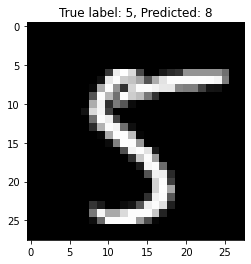

In [19]:
# test data prediction 
p_test = model.predict(x_test).argmax(axis=1)
misclassified = np.where(p_test!=y_test)[0]
i = np.random.choice(misclassified)
plt.imshow(x_test[i], cmap='gray')
plt.title(f"True label: {y_test[i]}, Predicted: {p_test[i]}")